In [55]:
import pandas as pd
import numpy as np

df = pd.read_csv('ratings_Beauty.csv')

In [56]:
df = df.sample(10000 , random_state = 42)

In [57]:
df

,UserId,ProductId,Rating,Timestamp
1909529,A2IL3S5JIMVU7G,B00DHG3KRY,5.0,1386979200
1602242,A33VGZOMZUOOG8,B007RNPAJO,1.0,1378512000
1181425,A3H1D1D0G80ZWA,B0047L3FRS,5.0,1367280000
1848825,A26XDAOZFABDKK,B00BNLHUPI,5.0,1372291200
961295,A12QIPKKP0OPOJ,B002ZW1RJY,4.0,1377820800
...,...,...,...,...
920402,A31SF54BOPYP4V,B002SPVA7M,5.0,1372550400
1116043,A1V1KH92XWFND4,B003VMG3RI,5.0,1397606400
183712,A30PPJVP7QJ5O4,B000BJ7WNS,5.0,1370995200
931050,A1YEMA3KHCVSEZ,B002ULA2Y6,5.0,1328745600


In [58]:
df.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

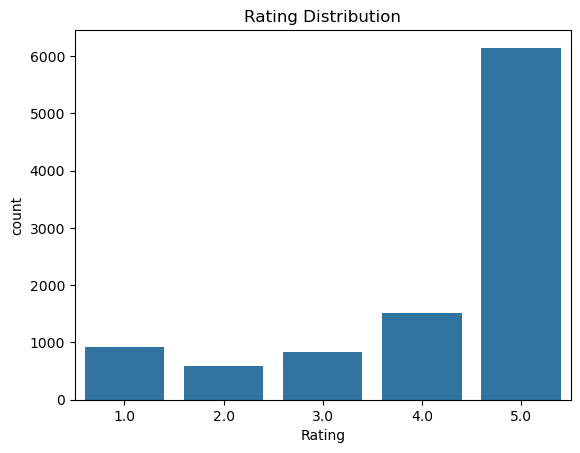

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Rating', data=df)
plt.title("Rating Distribution")
plt.show()


In [60]:
df['ProductId'].value_counts().head(10)


ProductId
B001MA0QY2    39
B0009V1YR8    15
B000ZMBSPE    13
B004INUWX0    13
B0043OYFKU    13
B001AO0WCG    11
B001JKTTVQ    11
B005Y6F4WO    10
B0000YUXI0    10
B00121UVU0     9
Name: count, dtype: int64

In [61]:
df['UserId'].value_counts().head(10)


UserId
A2Y4S4CNGKF21S    4
A3KEZLJ59C1JVH    4
ALQGOMOY1F5X9     3
A3J029KBNG5MNP    3
A3EXWV8FNSSFL6    2
AX2HFDKL6TYLM     2
A1R377IPZOKLMM    2
A2K5AFTU4YOPPW    2
A21936E2ZRY72J    2
A28KDX86A5I1KF    2
Name: count, dtype: int64

In [73]:
product_stats = (
    df.groupby('ProductId')['Rating']
      .agg(['count', 'mean'])
      .rename(columns={'count': 'rating_count', 'mean': 'avg_rating'})
)

product_stats.head()


,rating_count,avg_rating
ProductId,,
9571044822,1,5.0
9602617918,1,5.0
9788072992,1,5.0
9790779968,1,5.0
9790781210,1,5.0


In [74]:
import numpy as np

product_stats['score'] = (
    product_stats['avg_rating'] *
    np.log1p(product_stats['rating_count'])
)


In [75]:
def recommend_products(user_id, n=5):
    user_history = set(
        df[df['UserId'] == user_id]['ProductId']
    )

    ranked_products = product_stats.sort_values(
        'score', ascending=False
    ).index

    recommendations = [
        pid for pid in ranked_products
        if pid not in user_history
    ]

    return recommendations[:n]


In [76]:
sample_user = df['UserId'].iloc[0]
recommend_products(sample_user, n=5)


['B001MA0QY2', 'B000ZMBSPE', 'B0043OYFKU', 'B0009V1YR8', 'B001AO0WCG']